# Simplification for FEM -- Code tutorial

* Coding with Python in Jupyter notebook
* Basic elements in FEM code
* Convergence analysis for a concret physical case

## Python in Jupyter

* Brief introduction about Jupyter notebook
* Nesessary packages (Numpy, matplotlib)

In [1]:
import numpy as np
from numpy.polynomial.legendre import leggauss # Gauss quadrature
import matplotlib.pyplot as plt
%matplotlib inline

## Basic elements in FEM code

* Numerical quadrature (Gauss Legendre)
* Shape functions （linear, hieracchic)
* Elementary matrix and assembly
* Solve the linear system

In [2]:
def gauss_legendre_quad(f, n, a, b):
    x, w = leggauss(n)
    sum_ = 0
    for k in range(len(x)):
        sum_ += w[k] * f(0.5*(b-a)*x[k]+0.5*(b+a))
    return 0.5 * (b-a) * sum_

### Linear shape function

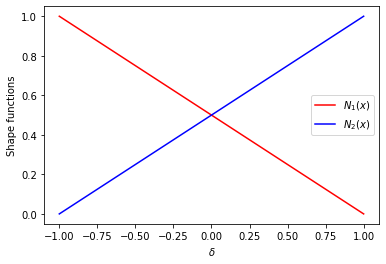

In [3]:
N1 = lambda x: -x/2+1/2
N2 = lambda x: x/2+1/2
dN1 = lambda x: -1/2  # B1
dN2 = lambda x: 1/2  # B2
x = np.linspace(-1,1,200)
plt.plot(x,N1(x),'r',label='$N_1(x)$')
plt.plot(x,N2(x),'b',label='$N_2(x)$')
plt.xlabel('$\delta$');plt.ylabel('Shape functions')
plt.legend()
plt.show()

### Quadratic shape function

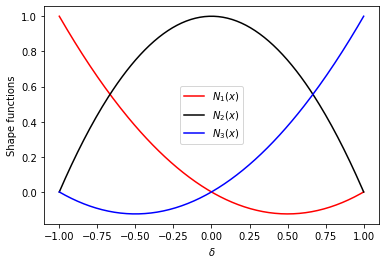

In [4]:
NN1 = lambda x: x**2/2 - x/2
NN2 = lambda x: -x**2+1
NN3 = lambda x: x**2/2 + x/2
x = np.linspace(-1,1,200)
plt.plot(x,NN1(x),'r',label='$N_1(x)$')
plt.plot(x,NN2(x),'k',label='$N_2(x)$')
plt.plot(x,NN3(x),'b',label='$N_3(x)$')
plt.xlabel('$\delta$');plt.ylabel('Shape functions')
plt.legend()
plt.show()

### High order shape function (Lobatto Hierarchical functions)

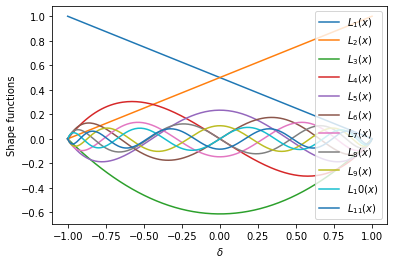

In [5]:
L1 = lambda x: -1/2 * x + 1/2
L2 = lambda x: 1/2 * x + 1/2
L3 = lambda x: 1/(6**0.5) * (1.5*(x - 1)*(x + 1))
L4 = lambda x: 1/(10**0.5) * (5*x*(x - 1)*(x + 1)/2)
L5 = lambda x: 1/(14**0.5) * (7*(x - 1)*(x + 1)*(5*x**2 - 1)/8)
L6 = lambda x: 1/(18**0.5) * (9*x*(x - 1)*(x + 1)*(7*x**2 - 3)/8)
L7 = lambda x: 1/(22**0.5) * (11*(x - 1)*(x + 1)*(21*x**4 - 14*x**2 + 1)/16)
L8 = lambda x: 1/(26**0.5) * (13*x*(x - 1)*(x + 1)*(33*x**4 - 30*x**2 + 5)/16)
L9 = lambda x: 1/(30**0.5) * (15*(x - 1)*(x + 1)*(429*x**6 - 495*x**4 + 135*x**2 - 5)/128)
L10 = lambda x: 1/(34**0.5) * (17*x*(x - 1)*(x + 1)*(715*x**6 - 1001*x**4 + 385*x**2 - 35)/128)
L11 = lambda x: 1/(38**0.5) * (19*(x - 1)*(x + 1)*(2431*x**8 - 4004*x**6 + 2002*x**4 - 308*x**2 + 7)/256)
plt.plot(x,L1(x),label='$L_1(x)$')
plt.plot(x,L2(x),label='$L_2(x)$')
plt.plot(x,L3(x),label='$L_3(x)$')
plt.plot(x,L4(x),label='$L_4(x)$')
plt.plot(x,L5(x),label='$L_5(x)$')
plt.plot(x,L6(x),label='$L_6(x)$')
plt.plot(x,L7(x),label='$L_7(x)$')
plt.plot(x,L8(x),label='$L_8(x)$')
plt.plot(x,L9(x),label='$L_9(x)$')
plt.plot(x,L10(x),label='$L_10(x)$')
plt.plot(x,L11(x),label='$L_{11}(x)$')
plt.xlabel('$\delta$');plt.ylabel('Shape functions')
plt.legend()
plt.show()


## ELementary matrix (Linear)

$ K = dN*dN $ Stiffness matrix
$$
K = 
\begin{bmatrix}
dN_1dN_1&dN_1dN_2\\
dN_2dN_1&dN_2dN_2
\end{bmatrix}$$

$ M = N * N $ Mass matrix
$$
M = 
\begin{bmatrix}
N_1N_1&N_1N_2\\
N_2N_1&N_2N_2
\end{bmatrix}$$

$$ \displaystyle{\int_0^\delta \phi_i(x)\phi_j(x) dx}=\dfrac{h}{2}\displaystyle{\int_{-1}^1 N_i(\xi)N_j(\xi) d\xi},\quad \displaystyle{\int_0^h \phi_i'(x)\phi_j'(x) dx}=\dfrac{2}{h}\displaystyle{\int_{-1}^1 N'_i(\xi)N'_j(\xi) d\xi}$$


In [6]:
L = 2
nb_e = 100
h = L / nb_e
nb_dof = nb_e + 1  # number of degree of freedom (nodes)

In [7]:
N = [N1, N2]
dN = [dN1, dN2]
K_e = np.zeros((2, 2))
M_e = np.zeros((2, 2))
for i in range(len(dN)):
    for j in range(len(dN)):
        f = lambda x: dN[i](x) * dN[j](x)
        K_e[i, j] = (2 / h) * gauss_legendre_quad(f, 5, -1, 1)
        g = lambda x: N[i](x) * N[j](x)
        M_e[i, j] = (h / 2) * gauss_legendre_quad(g, 5, -1, 1)

In [8]:
K_e

array([[ 50., -50.],
       [-50.,  50.]])

In [9]:
M_e

array([[0.00666667, 0.00333333],
       [0.00333333, 0.00666667]])

## Assembly the elementary matrix

ELement by element in normal sort
* Global stiffness matrix
* Force matrix

In [10]:
K = np.zeros((nb_dof, nb_dof))
for i in range(nb_e):
    K[i:i+2, i:i+2] += K_e - M_e
             

In [11]:
K

array([[ 49.99333333, -50.00333333,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-50.00333333,  99.98666667, -50.00333333, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , -50.00333333,  99.98666667, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  99.98666667,
        -50.00333333,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., -50.00333333,
         99.98666667, -50.00333333],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        -50.00333333,  49.99333333]])

In [12]:
F = np.zeros((nb_dof))
# F[0] = -1

In [13]:
F

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Solve the linear system

In [14]:
U = np.zeros((nb_dof))
# U[:] = np.linalg.solve(K, F)

# Simplification for FEM -- Coding tutorial (b)

**S.WU**

* FEM solution for a concrete mechanics problem
* Convergence of FEM solution

## Problem description

A bar of length $2l$, cross-sectional area $A$ and Young's modulus $E$. The bar is fixed at $x=0$, subjected to linear body force $cx$ and applied traction $\bar{t}=-cl^2/A$ at $x=2l$ as shown in Fig as follow:
<tr>
  <td><img src="model.png",width =600>  </td>
</tr>


In [15]:
E = 10e4  # Young modulus Nm-2
A = 1.  # Section area
c = 1.  # Nm-2
l = 1. # m
x_nodes = np.linspace(0, 2*l, nb_dof)

In [16]:
x_nodes

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08,
       1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 ,
       1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52,
       1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74,
       1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96,
       1.98, 2.  ])

**Strong form is given**
$$\frac{d}{dx}\left(AE\frac{du}{dx}\right)+cx=0,$$
\
$$u(0)=0,$$
\
$$\bar{t}=E\frac{du}{dx}n\ \Big|_{x=2l}=-\frac{cl^2}{A}$$

In [17]:
u_ex = lambda x: c/(A*E)*(-x**3/6+l**2*x)

**Derivation for the weak form (variational formulation)**
\
Multiplication of test function $v\in U^0$ and integration by part from $(0, 2l)$
\begin{equation}
AEv\frac{du}{dx}\ \Big|^{2l}_{0}-\int_0^{2l}AE\frac{dv}{dx}\frac{du}{dx}dx+c\int_0^{2l}vxdx=0
\end{equation}

\begin{equation}
\int_0^{2l}AE\frac{dv}{dx}\frac{du}{dx}dx=\int_0^{2l}vcxdx-vcl^2
\end{equation}
Thus, weak form for considered problem is given:
find $u \in U$
\begin{equation}
\int_0^{2l}AE\frac{dv}{dx}\frac{du}{dx}dx=cl^2,\ v\in U^0
\end{equation}

### Boundary conditions in considered problem

* Essential (Dirichlet) BCs $u(0)=0$
* Natural (Neumman) BCs 

In [37]:
F_e = np.zeros((2))
for i in range(nb_e):
    ff = lambda x: ((x_nodes[i+1]-x)/h)*c*x
    gg = lambda x: ((x-x_nodes[i])/h)*c*x
    F_e[0]= gauss_legendre_quad(ff, 5, x_nodes[i], x_nodes[i+1])
    F_e[1] = gauss_legendre_quad(gg, 5, x_nodes[i], x_nodes[i+1])
    F[i:i+2] += F_e   
F[-1] += -c*l**2

K = np.zeros((nb_dof, nb_dof))
for i in range(nb_e):
    K[i:i+2, i:i+2] += A*E*K_e
K[0] = 0
# K[:,0] = 0
K[0,0] = 1
U[:] = np.linalg.solve(K, F)

In [38]:
F

array([-6.66666667e-05,  1.62630326e-19, -3.25260652e-19, -5.42101086e-19,
        2.81892565e-18, -1.08420217e-18,  4.33680869e-19, -4.98732999e-18,
        8.45677695e-18, -5.42101086e-18, -6.07153217e-18,  1.21430643e-17,
       -6.50521303e-18, -4.33680869e-19, -1.56125113e-17,  1.56125113e-17,
       -2.16840434e-18,  2.03830008e-17, -1.99493200e-17,  1.73472348e-18,
       -2.25514052e-17,  2.51534904e-17, -1.73472348e-18,  2.42861287e-17,
       -2.60208521e-17, -8.67361738e-19, -8.67361738e-19,  0.00000000e+00,
       -6.33174069e-17,  5.81132364e-17,  8.67361738e-19,  3.46944695e-18,
        1.73472348e-18, -3.46944695e-18, -1.73472348e-18,  7.97972799e-17,
       -7.89299182e-17,  4.33680869e-18,  3.46944695e-18,  0.00000000e+00,
        1.73472348e-18, -9.71445147e-17,  9.71445147e-17,  0.00000000e+00,
       -6.93889390e-18,  0.00000000e+00,  1.73472348e-18,  1.05818132e-16,
       -1.07552856e-16,  1.73472348e-18, -5.20417043e-18, -1.73472348e-18,
        0.00000000e+00,  

In [39]:
K

array([[ 1.e+00,  0.e+00,  0.e+00, ...,  0.e+00,  0.e+00,  0.e+00],
       [-5.e+06,  1.e+07, -5.e+06, ...,  0.e+00,  0.e+00,  0.e+00],
       [ 0.e+00, -5.e+06,  1.e+07, ...,  0.e+00,  0.e+00,  0.e+00],
       ...,
       [ 0.e+00,  0.e+00,  0.e+00, ...,  1.e+07, -5.e+06,  0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00, ..., -5.e+06,  1.e+07, -5.e+06],
       [ 0.e+00,  0.e+00,  0.e+00, ...,  0.e+00, -5.e+06,  5.e+06]])

### Mesh and element size

* L physical geometry
* h elements size
* nb_dof number of degree of freedom

## Computational results

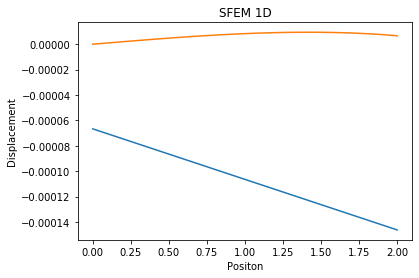

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('SFEM 1D')
ax.set_xlabel('Positon')
ax.set_ylabel('Displacement')
ax.plot(x_nodes, U, '-', label='FEM')
U_ex =  [u_ex(x) for x in x_nodes]
ax.plot(x_nodes, U_ex, '-', label='Analytical')

In [ ]:
u_ex(0)

In [ ]:
u_ex(x_nodes)